In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
failas = r'C:\Users\Kęstas\Desktop\Data Science project\Covid ep\data-table.csv'
mortality  = pd.read_csv(failas)

In [3]:
mortality.head()

,Laikotarpis,Rodiklis,Apskritys,Amžius (5 m. amžiaus grupės),Lytis,Savaitė,Matavimo vienetai,Reikšmė
0,2018,Savaitinis mirusiųjų skaičius,Lietuvos Respublika,Iš viso pagal amžių,Vyrai ir moterys,1 savaitė,asmenys,826.0
1,2018,Savaitinis mirusiųjų skaičius,Lietuvos Respublika,Iš viso pagal amžių,Vyrai,1 savaitė,asmenys,404.0
2,2018,Savaitinis mirusiųjų skaičius,Lietuvos Respublika,Iš viso pagal amžių,Moterys,1 savaitė,asmenys,422.0
3,2019,Savaitinis mirusiųjų skaičius,Lietuvos Respublika,Iš viso pagal amžių,Vyrai ir moterys,1 savaitė,asmenys,842.0
4,2019,Savaitinis mirusiųjų skaičius,Lietuvos Respublika,Iš viso pagal amžių,Vyrai,1 savaitė,asmenys,419.0


In [4]:
display(mortality.shape)
AllLT = mortality['Apskritys']=='Lietuvos Respublika'
AllAgeGroups =  mortality['Amžius (5 m. amžiaus grupės)']=='Iš viso pagal amžių'
AllGenders = mortality['Lytis']=='Vyrai ir moterys'
mortality_total = mortality[AllLT & AllAgeGroups & AllGenders]
display(mortality_total.shape)

(6162, 8)

(158, 8)

In [5]:
mortality_total = mortality_total[['Laikotarpis', 'Savaitė', 'Reikšmė']]
mortality_total = mortality_total[mortality_total['Savaitė']!='53 savaitė']
display(mortality_total.shape)

(156, 3)

In [6]:
mortality2018 = mortality_total[mortality_total['Laikotarpis']==2018]
mortality2019 = mortality_total[mortality_total['Laikotarpis']==2019]
mortality2020 = mortality_total[mortality_total['Laikotarpis']==2020]

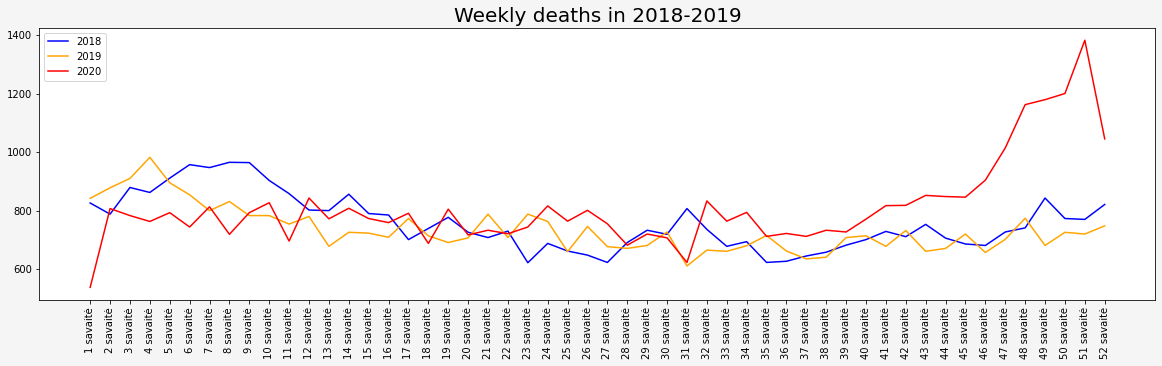

In [7]:
fig, ax = plt.subplots(figsize=(20,5),facecolor = "#F5F5F5")

plt.plot(mortality2018['Savaitė'],mortality2018['Reikšmė'], label = '2018' , color = "blue")
plt.plot(mortality2019['Savaitė'],mortality2019['Reikšmė'], label = '2019', color = "orange" )
plt.plot(mortality2020['Savaitė'],mortality2020['Reikšmė'], label = '2020', color = "red" )

plt.xticks(rotation = 90)
plt.legend()
plt.title('Weekly deaths in 2018-2019', fontsize = 20)
plt.show()

In [8]:
ecdf2018 = ECDF(mortality2018['Reikšmė'])
ecdf2019 = ECDF(mortality2019['Reikšmė'])
ecdf2020 = ECDF(mortality2020['Reikšmė'])

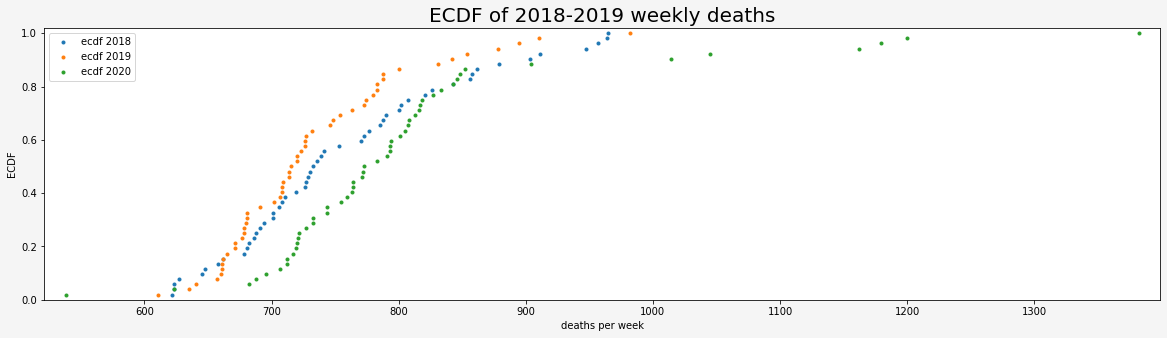

In [9]:
fig, ax = plt.subplots(figsize=(20,5),facecolor = "#F5F5F5")

plt.plot(ecdf2018.x, ecdf2018.y, label = 'ecdf 2018', marker='.', linestyle='none')
plt.plot(ecdf2019.x, ecdf2019.y, label = 'ecdf 2019', marker='.', linestyle='none')
plt.plot(ecdf2020.x, ecdf2020.y, label = 'ecdf 2020', marker='.', linestyle='none')

plt.margins(0.02)
plt.xlabel('deaths per week')
plt.ylabel('ECDF')
plt.title('ECDF of 2018-2019 weekly deaths', fontsize = 20)
plt.legend()

H0: weekly mortality is the same in 2019 and in 2018

In [10]:
wm2018 = mortality2018['Reikšmė']
wm2019 = mortality2019['Reikšmė']
wm2020 = mortality2020['Reikšmė']
mean_diff = np.mean(wm2019)- np.mean(wm2018)

In [11]:
mean_diff

-24.384615384615472

In [12]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [13]:
# 10,000 bootstrap replicates of the mean for the 2018 and 2019 weekly deaths
bs_replicates_2018 = draw_bs_reps(wm2018,np.mean, 10000)
bs_replicates_2019 = draw_bs_reps(wm2019,np.mean, 10000)

bs_diff_replicates = bs_replicates_2019 - bs_replicates_2018

In [14]:
# 95% confidence interval
conf_int = np.percentile(bs_diff_replicates, [2.5,97.5])

In [15]:
print('difference of means =', mean_diff, 'deaths per week')
print('95% confidence interval =', conf_int, 'deaths per week')

difference of means = -24.384615384615472 deaths per week
95% confidence interval = [-57.44278846   8.63461538] deaths per week


The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.

In [16]:
combined_mean = np.mean(np.concatenate((wm2018, wm2019)))

In [17]:
wm2018_shifted = wm2018 - np.mean(wm2018)+combined_mean
wm2019_shifted = wm2019 - np.mean(wm2019)+combined_mean


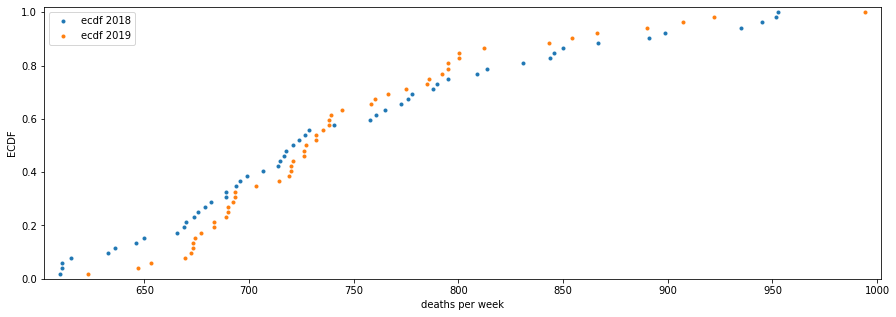

In [18]:
ecdf2018_shifted = ECDF(wm2018_shifted)
ecdf2019_shifted = ECDF(wm2019_shifted)

plt.figure(figsize=(15,5))

plt.plot(ecdf2018_shifted.x, ecdf2018_shifted.y, label = 'ecdf 2018', marker='.', linestyle='none')
plt.plot(ecdf2019_shifted.x, ecdf2019_shifted.y, label = 'ecdf 2019', marker='.', linestyle='none')

plt.margins(0.02)
plt.xlabel('deaths per week')
plt.ylabel('ECDF')
plt.legend()

In [19]:
bs_replicates_2018 = draw_bs_reps(wm2018_shifted,np.mean, 10000)
bs_replicates_2019 = draw_bs_reps(wm2019_shifted,np.mean, 10000)

bs_diff_replicates = bs_replicates_2019-bs_replicates_2018

In [20]:
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)
print('p =', 1-p)

p = 0.07179999999999997


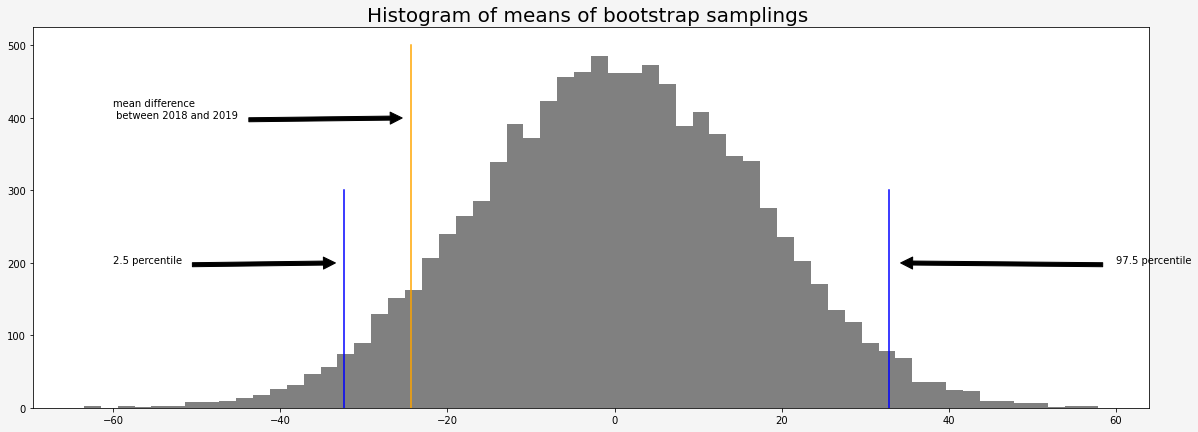

In [21]:
conf_int = np.percentile(bs_diff_replicates, [2.5,97.5])

fig, ax = plt.subplots(figsize=(20,7),facecolor = "#F5F5F5")

plt.hist(bs_diff_replicates, bins = 60, color = 'grey')
plt.plot([mean_diff, mean_diff],[0 ,500], color = "orange")
plt.plot([conf_int[0], conf_int[0]],[0 ,300], color = "blue")
plt.plot([conf_int[1], conf_int[1]],[0 ,300], color = "blue")

plt.title('Histogram of means of bootstrap samplings ', fontsize = 20)

ax.annotate('2.5 percentile', xy=(conf_int[0], 200), xytext=(-60, 200),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.annotate('97.5 percentile', xy=(conf_int[1], 200), xytext=(60, 200),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.annotate('mean difference \n between 2018 and 2019', xy=(mean_diff, 400), xytext=(-60,400),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()

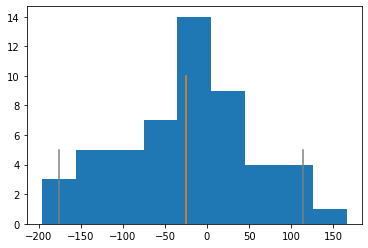

In [22]:
wmd = np.array(wm2019)-np.array(wm2018)
conf_int = np.percentile(wmd, [2.5,97.5])
wmd_mean = np.mean(wmd)

plt.hist(wmd, bins = 9)
plt.plot([wmd_mean, wmd_mean],[0 ,10])
plt.plot([conf_int[0], conf_int[0]],[0 ,5], color = "grey")
plt.plot([conf_int[1], conf_int[1]],[0 ,5], color = "grey")
plt.show()

In [23]:
## Import the packages
import numpy as np
from scipy import stats

a = np.array(wm2019)

b = np.array(wm2018)

## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

t = -1.4552636857957861
p = 0.1486670735461076


In [24]:
## Import the packages
import numpy as np
from scipy import stats

a = np.array(wm2020)

b = np.array(wm2019)

## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

t = 3.285784981564999
p = 0.0013948373217051613


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
file_json_full = 'ftp://atviriduomenys.nvsc.lt/COVID19.json'
json_data_full = pd.read_json(file_json_full)
json_data_full['Atvejo patvirtinimo data']=pd.to_datetime(json_data_full['Atvejo patvirtinimo data'])

In [64]:
import datetime
json_data_full.head()
Covid19=json_data_full[json_data_full['Išeitis']=='Mirė']
Covid19 = Covid19[['Atvejo patvirtinimo data','Išeitis']].set_index('Atvejo patvirtinimo data')
Covid19 = Covid19.resample('W').count().reset_index()

Covid19['week'] = Covid19['Atvejo patvirtinimo data'].dt.isocalendar().week
Covid19['year'] = Covid19['Atvejo patvirtinimo data'].dt.isocalendar().year

Covid19 = Covid19[(Covid19['week'] <53) & (Covid19['year'] ==2020) ]
Covid19 = Covid19[['week','Išeitis' ]]

Dict1 = {'week': [1,2,3,4,5,6,7,8,9,10,11],
        'Išeitis' : [0,0,0,0,0,0,0,0,0,0,0]}
df = pd.DataFrame(Dict1)
Covid19_2020 = pd.concat([df,Covid19] ).reset_index()['Išeitis']


In [65]:
wm2020_without = wm2020-np.array(Covid19_2020)

In [66]:
json_data_full['Susirgimo data'] = pd.to_datetime(json_data_full['Susirgimo data']) #"Start of sickness" 
json_data_full['Atvejo patvirtinimo data'] = pd.to_datetime(json_data_full['Atvejo patvirtinimo data']) #"Positive test date"

display(json_data_full['Išeitis'].unique())

Condition1  = json_data_full['Išeitis']=='Gydomas'
Condition2  = json_data_full['Išeitis']=='Pasveiko'
Condition3  = json_data_full['Išeitis']=='Mirė'

json_data_full = json_data_full[Condition1 | Condition2 | Condition3]

print('last date: ', json_data_full['Atvejo patvirtinimo data'].max())
print('Total cases ', json_data_full['Išeitis'].count() )

y= json_data_full['Išeitis'].count()
x = 154550
print('Skirtumas nuo pateiktos oficialos statistikos 2021-01-06 datai ' , x-y)

array(['Mirė', 'Pasveiko', 'Kita', 'Gydomas', '', 'Nesirgo'], dtype=object)

last date:  2021-01-06 00:00:00
Total cases  153611
Skirtumas nuo pateiktos oficialos statistikos 2021-01-06 datai  939


In [67]:
Covid_cases = json_data_full[['Atvejo patvirtinimo data','Išeitis']].set_index('Atvejo patvirtinimo data')
Covid_cases = Covid_cases.resample('W').count().reset_index()

Covid_cases['week'] = Covid_cases['Atvejo patvirtinimo data'].dt.isocalendar().week
Covid_cases['year'] = Covid_cases['Atvejo patvirtinimo data'].dt.isocalendar().year
Covid_cases = Covid_cases[(Covid_cases['week'] <53)  & (Covid_cases['year'] ==2020) ]
Covid_cases = Covid_cases[['week','Išeitis' ]]

Dict1 = {'week': [1,2,3,4,5,6,7,8],
        'Išeitis' : [0,0,0,0,0,0,0,0]}
df = pd.DataFrame(Dict1)
Covid_cases_2020 = pd.concat([df,Covid_cases] ).reset_index()['Išeitis']


In [68]:
## Import the packages
import numpy as np
from scipy import stats

a = np.array(wm2019)

b = np.array(wm2020_without)

## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

t = -2.5764021894576303
p = 0.011415133771060765


array([[1.        , 0.71450413],
       [0.71450413, 1.        ]])

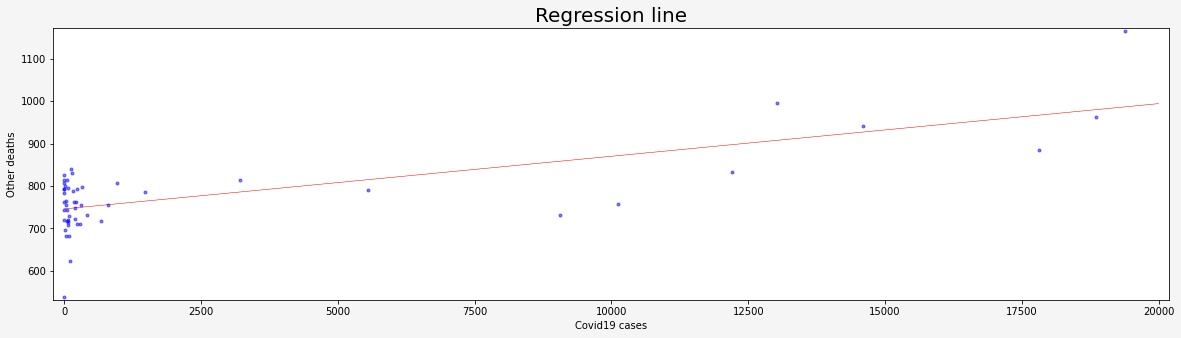

In [69]:
fig, ax = plt.subplots(figsize=(20,5),facecolor = "#F5F5F5")

r = np.corrcoef(Covid_cases_2020, wm2020_without)
display(r)

slope, intercept = np.polyfit(Covid_cases_2020, wm2020_without, 1)
x = np.array([0, 20000])
plt.plot(x, slope*x+intercept,
             linewidth=0.5, color='red')

plt.plot(Covid_cases_2020, wm2020_without, marker='.',
             linestyle='none', color='blue', alpha=0.5)

plt.xlabel("Covid19 cases")
plt.ylabel("Other deaths")
plt.title("Regression line", fontsize = 20)
plt.margins(0.01)
plt.show()

#pakeisti covid mirciu skaiciu i susirgimo ska.

In [70]:
print("slope ", round(slope,3), ' and intercept ', round(intercept,3))

slope  0.012  and intercept  746.011


In [132]:
X_to_predict_np = np.array(X_to_predict)

y_new = knn.predict(X_to_predict_np)

y_new

array([2, 2, 2, ..., 2, 2, 2], dtype=int8)

In [133]:
display(pd.DataFrame(y_new).value_counts())
display(json_data_full[["Išeitis",'Išeitis_cat']].value_counts())

2    64203
1     1493
dtype: int64

Išeitis   Išeitis_cat
Pasveiko  2              86139
Gydomas   0              65696
Mirė      1               1776
dtype: int64

In [173]:
#https://towardsdatascience.com/principal-component-analysis-pca-from-scratch-in-python-7f3e2a540c51
data_num = np.array(X)

In [174]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(data_num)
X_scaled[:5]

array([[ 1.0409698 ,  1.13410841,  2.85302006, -0.04166783,  4.4690144 ,
        23.64250733],
       [-0.03208232,  1.13410841, -0.35050577,  1.56284738,  4.4690144 ,
        -0.0422967 ],
       [ 1.0409698 ,  1.13410841, -0.35050577,  0.909156  ,  4.4690144 ,
        -0.0422967 ],
       [-0.56860839,  1.13410841, -0.35050577,  0.96858249,  4.4690144 ,
        -0.0422967 ],
       [ 0.50444374, -0.85740544, -0.35050577,  0.909156  ,  4.4690144 ,
        -0.0422967 ]])

In [175]:
features = X_scaled.T
cov_matrix = np.cov(features)
cov_matrix[:5]

array([[ 1.00001137e+00, -4.65895149e-02,  2.61329877e-01,
        -2.57329703e-02,  2.68274083e-01,  5.22691421e-02],
       [-4.65895149e-02,  1.00001137e+00, -1.46781152e-02,
         1.00854583e-02,  2.12845039e-02,  1.04123939e-02],
       [ 2.61329877e-01, -1.46781152e-02,  1.00001137e+00,
        -5.59306282e-02,  1.82517313e-01,  7.14803951e-02],
       [-2.57329703e-02,  1.00854583e-02, -5.59306282e-02,
         1.00001137e+00, -1.00851365e-02, -3.69559991e-04],
       [ 2.68274083e-01,  2.12845039e-02,  1.82517313e-01,
        -1.00851365e-02,  1.00001137e+00,  1.72591123e-01]])

In [176]:
values, vectors = np.linalg.eig(cov_matrix)
print(values[:5])
print('\n')
print(vectors[:5])

[1.53658064 0.68198892 0.79143243 1.04157774 0.95567865]


[[-0.56713035  0.70798721  0.23105325 -0.18575459 -0.2760507   0.11411797]
 [ 0.03715228  0.11935632 -0.03700787  0.63238532 -0.47416033 -0.59855241]
 [-0.51657768 -0.31261343 -0.72964039 -0.19755429 -0.24475793 -0.06411789]
 [ 0.09241823 -0.01912612 -0.13853965  0.47604974 -0.34874701  0.7897164 ]
 [-0.55684128 -0.56595591  0.56468638  0.2215638   0.02820077  0.02941402]]


In [186]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))

print(np.sum(explained_variances), '\n', explained_variances)  

1.0 
 [0.25609386037981996, 0.11366352719955343, 0.13190390398302637, 0.17359431503632158, 0.15927796338333727, 0.16546643001794145]


In [209]:
projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[3])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = y
res.head()

,PC1,PC2,Y
0,-11.666700,12.771693,1
1,-2.089908,2.505378,2
2,-2.758881,1.994864,2
3,-1.840548,2.322140,2
4,-2.528590,0.835122,2


c:\users\kęstas\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1'>

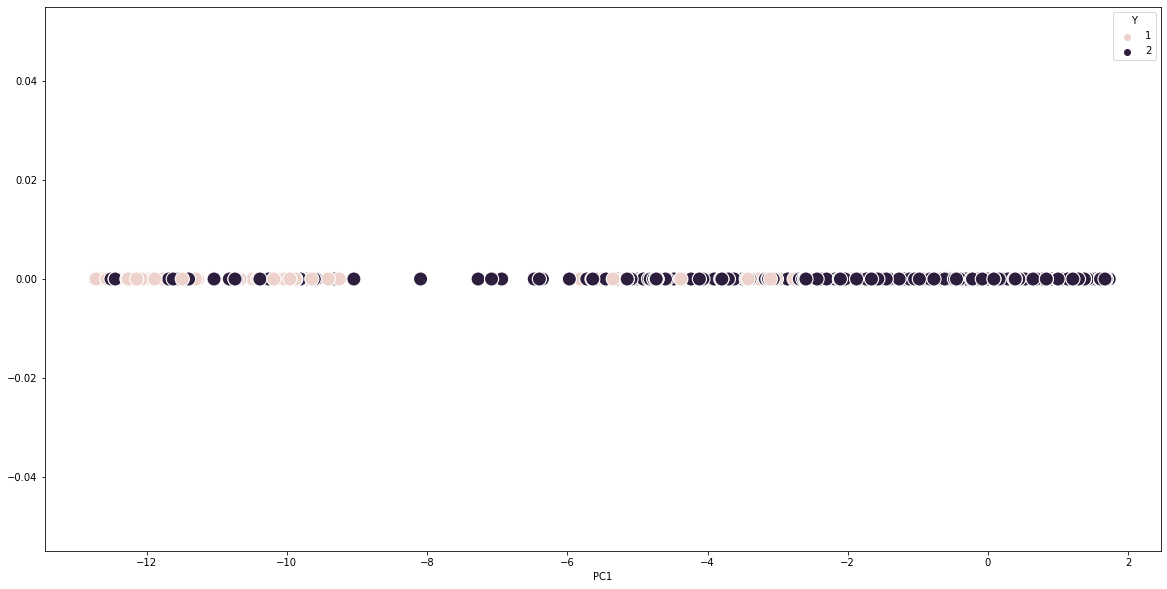

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.scatterplot(res['PC1'], [0] * len(res), hue=res['Y'], s=200)

c:\users\kęstas\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

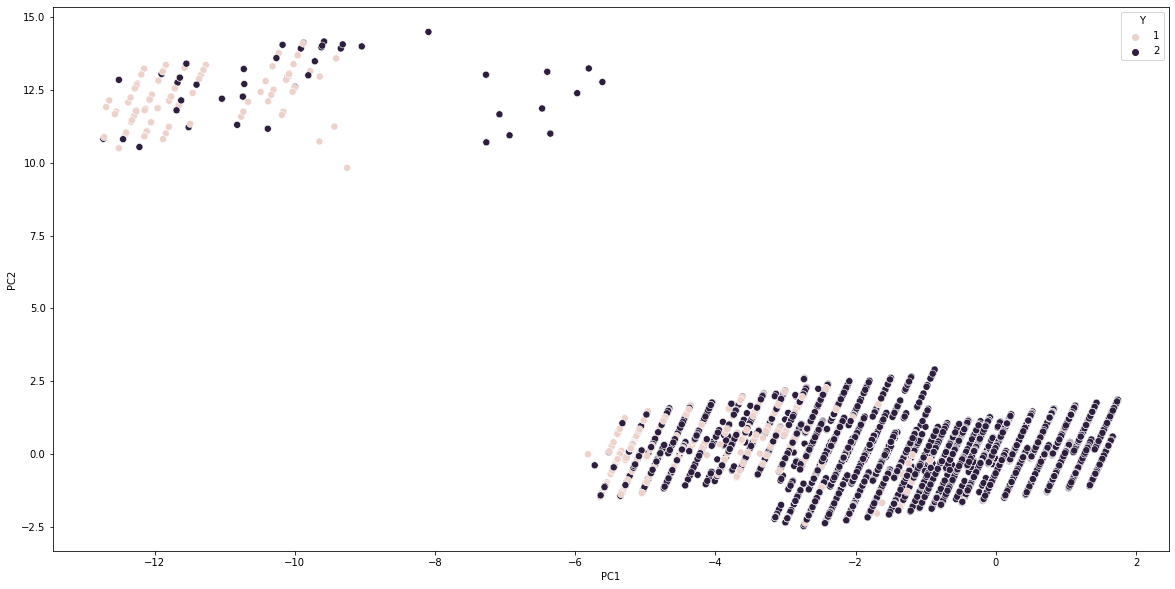

In [213]:
plt.figure(figsize=(20, 10))
sns.scatterplot(res['PC1'], res['PC2'], hue=res['Y'], s=50)

In [214]:
# Principal Component Analysis
from numpy import array
from sklearn.decomposition import PCA
# define a matrix
A = np.array(X)
from sklearn.preprocessing import StandardScaler
A = StandardScaler().fit_transform(A)

# create the PCA instance
pca = PCA(6)
# fit on data
pca.fit(A)
# access values and vectors
print(pca.explained_variance_)
# transform data
B = pca.transform(A)
display(np.sum(pca.explained_variance_))
display(pca.explained_variance_/np.sum(pca.explained_variance_))
explained_varianceList = pca.explained_variance_/np.sum(pca.explained_variance_)
display(np.sum(explained_varianceList[0:3]))

[1.53658064 1.04157774 0.99280987 0.95567865 0.79143243 0.68198892]


6.000068248515482

array([0.25609386, 0.17359432, 0.16546643, 0.15927796, 0.1319039 ,
       0.11366353])

0.5951546054340724